In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
!pwd

/Users/sophiebekerman/ECE_GDL/ProtWaveVAE


In [7]:
df = pd.read_csv("../../ProtWaveVAE/Pfam_analysis/outputs/prediction/pfam/Globin/globin_train_dataset_inference.csv")
z_columns = ['z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5']

df

,Unnamed: 0,Protein ID,Protein Info,Organism,Taxonomy,Unaligned_Sequence,z_0,z_1,z_2,z_3,z_4,z_5,z_0_mode,z_1_mode,z_2_mode,z_3_mode,z_4_mode,z_5_mode
0,0,A0A2J8R2J5_PONAB,"Unknown protein,EC=No EC number",Pongo abelii,Eukaryota Metazoa Chordata Craniata Vertebrata...,MVLSPADKTNVKTAWGKVGAHAGDYGAEALERMFLSFPTTKTYFPH...,-0.723258,-0.443093,-0.761336,-0.857322,-0.597240,0.413367,-1.050093,-0.887794,-0.945877,-0.986622,-1.031483,-0.512671
1,1,A0A2K6R518_RHIRO,"Unknown protein,EC=No EC number",Rhinopithecus roxellana,Eukaryota Metazoa Chordata Craniata Vertebrata...,MVLSPADKTNVKAAWGKVGGHGGEYGAEALERMFLSFPTTKTYFPH...,-0.629696,-0.458756,-0.870010,-0.817361,-0.944094,0.240957,-1.049206,-0.885790,-0.944771,-0.986833,-1.031955,-0.510439
2,2,A0A341AFD2_NEOAA,"Unknown protein,EC=No EC number",Neophocaena asiaeorientalis asiaeorientalis,Eukaryota Metazoa Chordata Craniata Vertebrata...,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,-0.803277,-0.732745,-0.820471,-0.446009,-0.521683,-0.032165,-1.052294,-0.889946,-0.947863,-0.988329,-1.033224,-0.514292
3,3,HBA_GORGO,"Hemoglobin subunit alpha,EC=No EC number",Gorilla gorilla gorilla,Eukaryota Metazoa Chordata Craniata Vertebrata...,VLSPADKTNVKAAWGKVGAHAGDYGAEALERMFLSFPTTKTYFPHF...,0.456717,1.685461,-0.542133,-2.600927,0.255889,-1.819089,0.278262,1.488016,-0.685025,-2.644511,0.156571,-1.893012
4,5,HBA_PANPA,"Hemoglobin subunit alpha,EC=No EC number",Pan paniscus,Eukaryota Metazoa Chordata Craniata Vertebrata...,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,-0.807747,-0.383901,-0.822426,-0.779563,-0.753501,0.122249,-1.052294,-0.889946,-0.947863,-0.988329,-1.033224,-0.514292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1588,A0A7K6AI98_UPUEP,"Unknown protein,EC=No EC number",Upupa epops,Eukaryota Metazoa Chordata Craniata Vertebrata...,MLSAEEKILLQQVREKLKSHEEEIGSAALERMFITYPQTKTYFPHF...,0.035816,0.353363,0.781987,0.211814,0.505959,0.869722,-0.319705,-0.183789,-0.108150,-0.304484,-0.267900,0.091002
1571,1589,A0A7K7SZE5_9TYRA,"Unknown protein,EC=No EC number",Sapayoa aenigma,Eukaryota Metazoa Chordata Craniata Vertebrata...,MLTGEDKKLIQMVWEKVAGCQEDVGCETLDRMFATYPQTKTYFPHF...,2.508392,-1.130331,-0.602197,3.618821,-2.948178,-0.902791,1.384325,-1.596579,-0.725963,2.237292,-3.259116,-1.100661
1572,1590,A0A3B1J9L7_ASTMX,"Unknown protein,EC=No EC number",Astyanax mexicanus,Eukaryota Metazoa Chordata Craniata Vertebrata...,MSLTAKDVAVVKALWGKIGAKADDIGAEALGRMLTVYPQTKTYFAH...,0.310923,1.013533,0.566534,-0.049311,-0.026619,0.562207,-0.177678,-0.040925,0.100835,-0.162670,-0.060357,0.130635
1573,1591,A0A3B1JFA9_ASTMX,"Unknown protein,EC=No EC number",Astyanax mexicanus,Eukaryota Metazoa Chordata Craniata Vertebrata...,MSLTVDDMAAVKALWGKIGAKADEIGAEALGRMLTVYPQTKTYFAH...,0.027472,0.498850,0.815278,0.029902,0.344424,0.639812,-0.177505,-0.041211,0.100602,-0.162162,-0.060271,0.130224


In [9]:
df["Taxonomy"].unique()

array(['Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Euarchontoglires Primates Haplorrhini Catarrhini Hominidae Pongo',
       'Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Euarchontoglires Primates Haplorrhini Catarrhini Cercopithecidae Colobinae Rhinopithecus',
       'Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Laurasiatheria Artiodactyla Whippomorpha Cetacea Odontoceti Phocoenidae Neophocaena',
       'Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Euarchontoglires Primates Haplorrhini Catarrhini Hominidae Gorilla',
       'Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Euarchontoglires Primates Haplorrhini Catarrhini Hominidae Pan',
       'Eukaryota Metazoa Chordata Craniata Vertebrata Euteleostomi Mammalia Eutheria Euarchontoglires Primates Haplorrhini Platyrrhini Cebidae Callitrichinae Callithrix Callithrix',
       'E

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


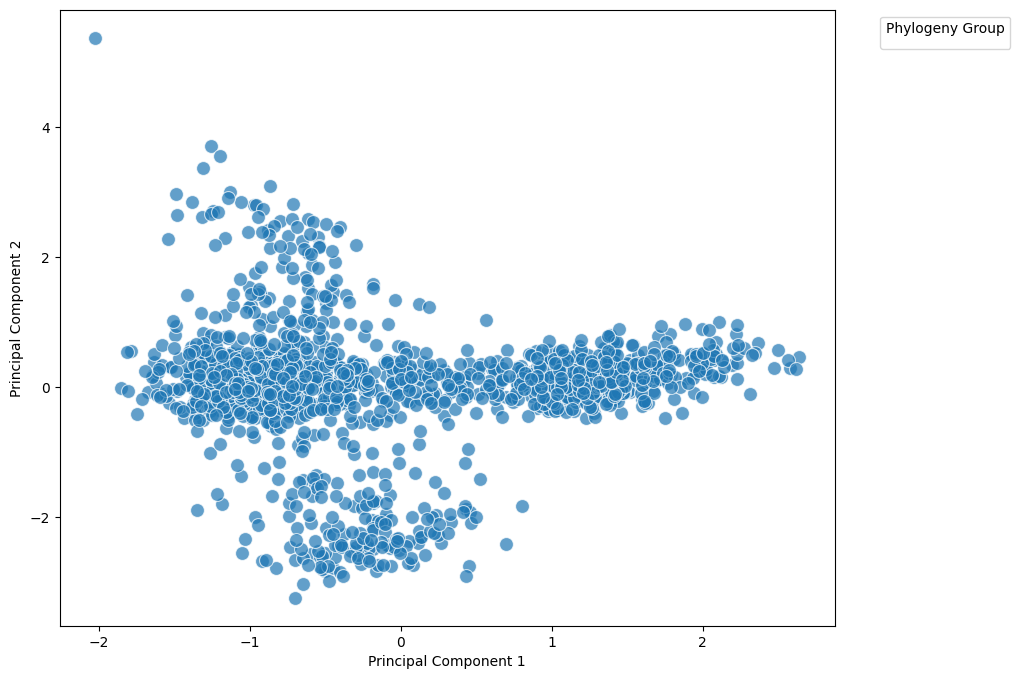

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[z_columns])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()